In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import json
import io
import cv2

In [2]:
model = tf.keras.models.load_model('models/new_train_model_epoch_100_batch_10')


In [3]:
f = open('dataset/category-images/valid-folder-map.json')
data = json.load(f)

In [4]:
classes = data['data']

In [5]:
class_titles = []

In [6]:
for cl in classes:
    strng = cl['type'] + " "+ cl['name'] + " "+cl['genra']
    class_titles.append(strng)

In [7]:
print(class_titles)

['Fresh Banana Fruit', 'Rotten Banana Fruit', 'Fresh Guava Fruit', 'Rotten Guava Fruit', 'Fresh Jackfruit Fruit', 'Rotten Jackfruit Fruit', 'Fresh Mango Fruit', 'Rotten Mango Fruit', 'Fresh Papaya Fruit', 'Rotten Papaya Fruit', 'Fresh star fruit Fruit', 'Rotten star fruit Fruit', 'Fresh Calabash Vegetable', 'Rotten Calabash Vegetable', 'Fresh Carrot Vegetable', 'Rotten Carrot Vegetable', 'Fresh Cauliflower Vegetable', 'Rotten Cauliflower Vegetable', 'Fresh cucumber Vegetable', 'Rotten cucumber Vegetable', 'Fresh Eggplant Vegetable', 'Rotten Eggplant Vegetable', 'Fresh potato Vegetable', 'Rotten potato Vegetable']


In [8]:
data = pd.read_csv('dataset/excels/train_set.csv')
Train_Height = int(round(data['height'].mean(), 0))
Train_Width = int(round(data['width'].mean(), 0))

Rotten Banana Fruit 78.32%


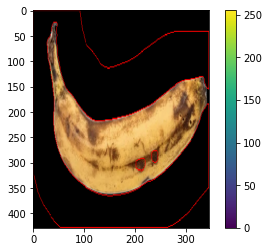

Rotten Banana Fruit 80.00%


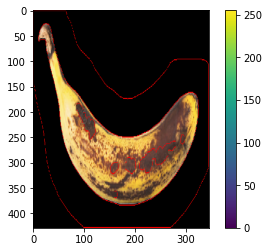

Fresh Mango Fruit 10.11%


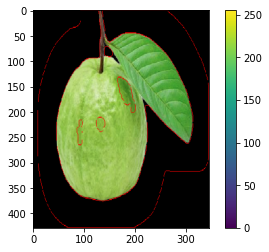

Rotten Guava Fruit 98.60%


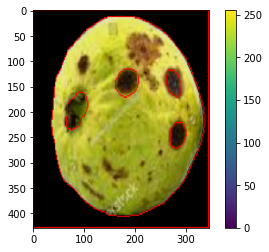

Fresh Jackfruit Fruit 99.28%


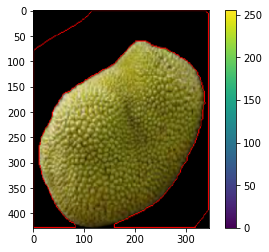

Rotten Jackfruit Fruit 87.27%


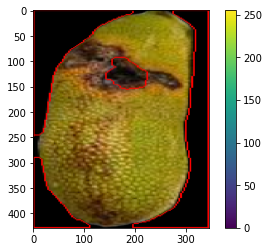

Fresh Mango Fruit 99.74%


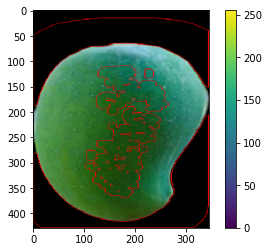

Rotten Mango Fruit 99.69%


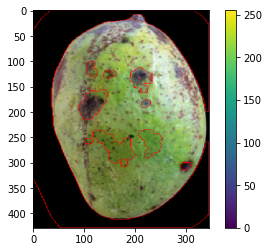

Fresh Papaya Fruit 98.84%


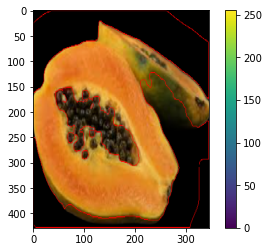

Rotten Papaya Fruit 93.70%


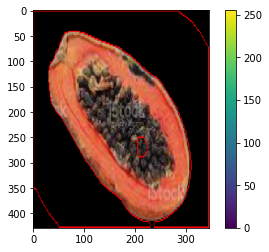

Rotten potato Vegetable 70.59%


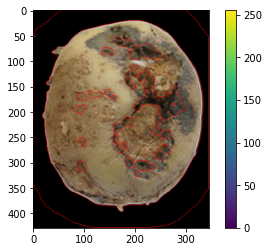

Fresh potato Vegetable 95.28%


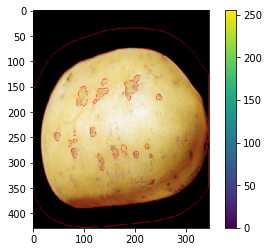

Fresh Eggplant Vegetable 79.34%


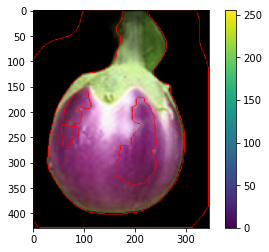

Rotten cucumber Vegetable 68.84%


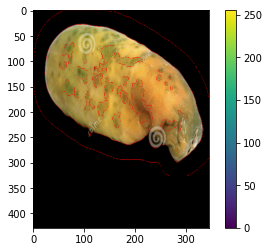

Fresh cucumber Vegetable 98.12%


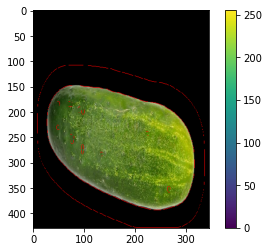

Fresh Cauliflower Vegetable 90.08%


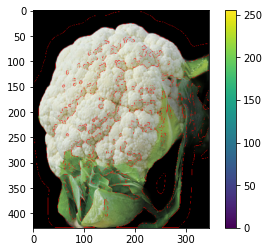

Rotten Carrot Vegetable 68.91%


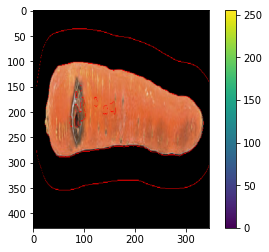

Fresh Carrot Vegetable 99.69%


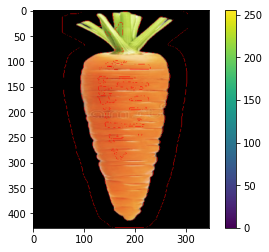

Rotten star fruit Fruit 90.49%


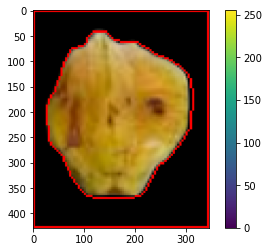

Fresh star fruit Fruit 96.11%


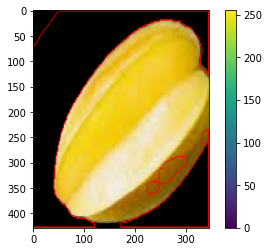

In [9]:

for i in range(1,21):
    path = 'dataset/test-data/'+str(i)+'-a.png'
    img = image.load_img(path,target_size=(Train_Height,Train_Width,3))
    plt.imshow(img)
    plt.colorbar()
    img = image.img_to_array(img)
    img = img/255.0
    img = img.reshape(1,Train_Height,Train_Width,3)
    y_prob = model.predict(img)
    top_predicts = np.argsort(y_prob[0])[:-4:-1]
    rs = class_titles[top_predicts[0]] + str(" {:.2f}".format(max(y_prob[0])*100))+'%' #+ str(top_predicts)
    print(rs)
    plt.show()
    plt.close()
